# **Project: Exploring Nonlinear Relationships Using Smoothing Methods**

## Course: Advanced Regression (MDTS4313)
## Department M.Sc. Data Sciecne
## Semester: 3

## Name: Sohini Mandal
## Roll Number: 444

In [519]:
# Importing essential libraries

import numpy as np                      # For numerical operations and array handling
import pandas as pd                     # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt          # For basic data visualization and plotting
import seaborn as sns                   # For enhanced, statistical-style visualizations
import statsmodels.api as sm            # For statistical modeling and smoothers like LOWESS
from sklearn.model_selection import train_test_split, KFold, cross_val_score  # For splitting data into train/test sets and performing cross-validation
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating model performance using MSE and MAE metrics
from sklearn.neighbors import KNeighborsRegressor  # For implementing the K-Nearest Neighbors regression model


In [520]:
# Loading the dataset

fish= pd.read_csv("C:/Users/ASUS/Desktop/Fishers.csv")

In [521]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Dataset name: Fish Market

Dataset link: https://www.kaggle.com/datasets/vipullrathod/fish-market

Dataset description: 

The fish market dataset is a collection of data related to various species of fish and their characteristics. This dataset is designed for polynomial regression analysis and contains several columns with specific information. Here's a description of each column in the dataset:

Species: This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish." This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.

Weight: This column represents the weight of the fish. It is a numerical variable that is typically measured in grams. The weight is the dependent variable we want to predict using polynomial regression.

Length1: This column represents the first measurement of the fish's length. It is a numerical variable, typically measured in centimetres.

Length2: This column represents the second measurement of the fish's length. It is another numerical variable, typically measured in centimetres.

Length3: This column represents the third measurement of the fish's length. Similar to the previous two columns, it is a numerical variable, usually measured in centimetres.

Height: This column represents the height of the fish. It is a numerical variable, typically measured in centimetres.

Width: This column represents the width of the fish. Like the other numerical variables, it is also typically measured in centimetres.

The dataset is structured in such a way that each row corresponds to a single fish with its species and various physical measurements (lengths, height, and width). The goal of using polynomial regression on this dataset would be to build a predictive model that can estimate the weight of a fish based on its species and the provided physical measurements. Polynomial regression allows for modelling more complex relationships between the independent variables (lengths, height, and width) and the dependent variable (weight), which may be particularly useful if there are non-linear patterns in the data.

In [522]:
# Defining the predictor (independent variable) and target (dependent variable)

X = fish["Length2"]           # 'Length2' is chosen as the feature (X),
y = fish["Weight"]            # 'Weight' is the output variable (y)


Definitions of X and Y: 

Independent Variable (X):
Length2: Diagonal length of fish in cm. It is a continuous variable.

Dependent Variable (Y):
Weight: Weight of fish in grams. It is also continuous.

Text(0.5, 1.0, 'Scatterplot of Y vs X')

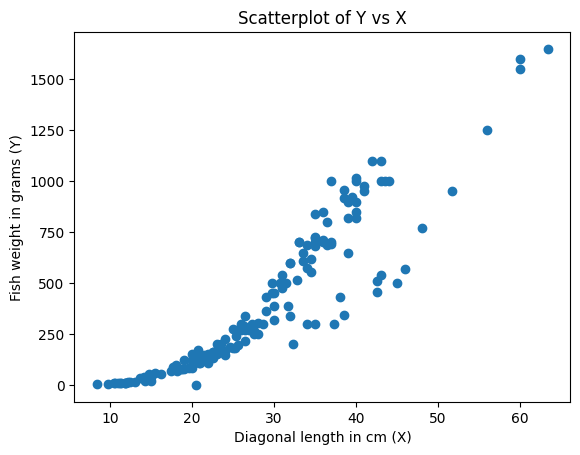

In [523]:
# Creating a scatter plot to visualize the relationship between fish length and weight

plt.scatter(X,y,marker="o")
plt.xlabel("Diagonal length in cm (X)")
plt.ylabel("Fish weight in grams (Y)")
plt.title("Scatterplot of Y vs X")

Why did you choose this dataset?

I chose the Fish Market Dataset because it provides clean, real-world continuous variables that describe measurable physical traits of fish. The dataset is small but rich, allowing clear visualization of nonlinear growth patterns between fish dimensions and weight. Moreover, it’s publicly available and widely used for demonstrating polynomial and nonlinear regression models.

Why do you expect the relationship between X and Y to be nonlinear?

The relationship between fish length and weight is inherently nonlinear because as a fish grows, its body mass does not increase proportionally to its length. Instead, weight tends to grow with the cube of length (approximately following W∝L^3), since volume—and hence mass—increase more rapidly than linear dimensions. Thus, the data points form a curved pattern instead of a straight line.

What type of nonlinear relationship do you suspect (e.g., quadratic, exponential,
saturating)?

I suspect a quadratic relationship, where fish weight increases with the square (or higher-order polynomial) of length. This is evident from the upward curvature in the scatterplot of Weight vs. Length2. The rate of increase in weight accelerates as length increases, forming a parabolic trend typical of quadratic growth.

In [524]:
subset = pd.DataFrame({
    "Diagonal length": X,
    "Weight": y
})


In [525]:
subset

,Diagonal length,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
...,...,...
154,12.2,12.2
155,12.4,13.4
156,13.0,12.2
157,14.3,19.7


In [526]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diagonal length  159 non-null    float64
 1   Weight           159 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [527]:
subset.isna().sum()        # No missing values

Diagonal length    0
Weight             0
dtype: int64

Text(0.5, 1.0, 'Boxplots')

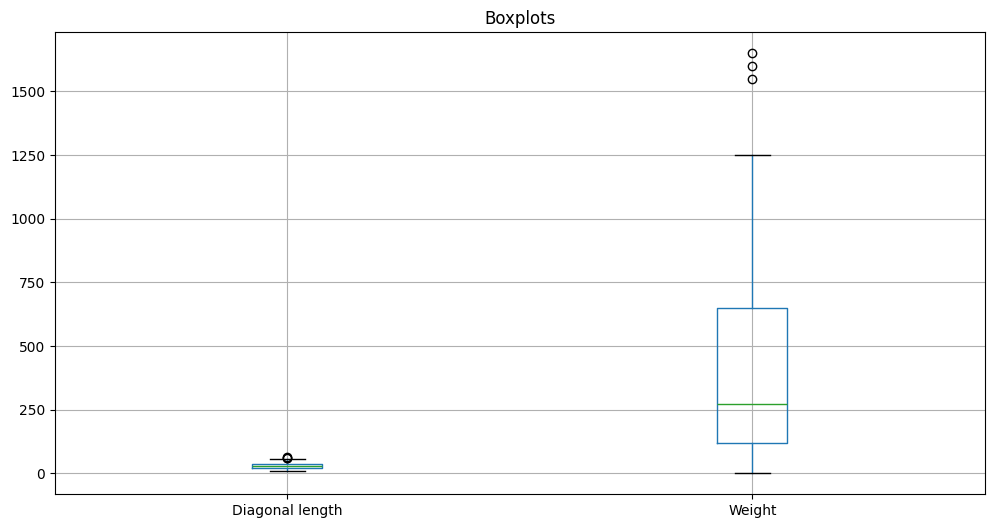

In [528]:
# Creating boxplots for all variables in the 'subset' DataFrame to visualize data distribution and outliers

subset.boxplot(figsize=(12,6))
plt.title("Boxplots")

The boxplot showed a few high-value points in Weight, which lie far above the upper whisker.
These are potential outliers representing unusually high weighted fish, which may disproportionately influence regression fitting.

Outliers were detected using the Interquartile Range (IQR) method, a standard statistical approach.
IQR=Q3−Q1

A data point is considered an outlier if:
x< Q1 - 1.5 x IQR    or     x> Q3 + 1.5 x IQR

In [529]:
# Detecting and removing outliers from the dataset using the Interquartile Range (IQR) method

Q1 = subset.quantile(0.25)   # Calculating the 25th percentile (first quartile) for each column
Q3 = subset.quantile(0.75)   # Calculating the 75th percentile (third quartile) for each column
IQR = Q3 - Q1                # Computing the Interquartile Range (IQR)

# Filtering the dataset to remove rows containing outliers
# A value is considered an outlier if it lies below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
subset_cleaned = subset[
    ~(
        (subset < (Q1 - 1.5 * IQR)) | 
        (subset > (Q3 + 1.5 * IQR))
    ).any(axis=1)             # Checking for outliers across all columns (axis=1)
]


In [530]:
subset.shape

(159, 2)

In [531]:
subset_cleaned.shape   # 3 outliers removed

(156, 2)

Text(0.5, 1.0, 'Scatterplot After Outlier Removal')

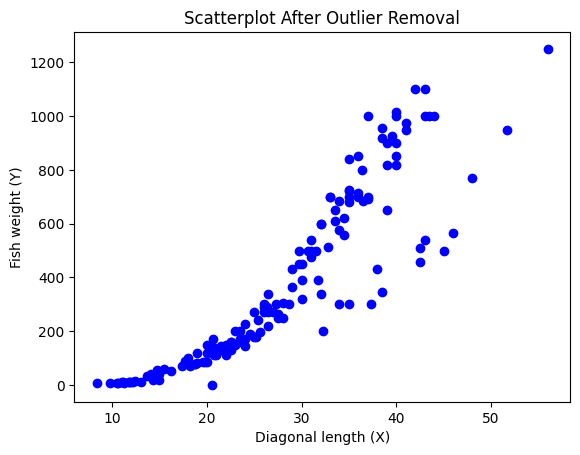

In [532]:
# Creating a scatter plot of the cleaned dataset after removing outliers

plt.scatter(subset_cleaned["Diagonal length"], subset_cleaned["Weight"], color="blue")
plt.xlabel("Diagonal length (X)")
plt.ylabel("Fish weight (Y)")
plt.title("Scatterplot After Outlier Removal")

How many missing values were found and removed?

There were no missing values.

What criteria did you use to detect outliers?

I used the Interquartile Range (IQR) method to detect outliers.
Criterion Explanation:
The IQR method identifies outliers based on the spread of the middle 50% of the data
IQR=Q3−Q1
where
Q1 = 25th percentile,
Q3 = 75th percentile.
An observation is considered an outlier if it lies beyond 1.5 times the IQR below the first quartile or above the third quartile:
Lower bound=Q1−1.5×IQR
Upper bound=Q3+1.5×IQR
Any data point:
X< Lower bound or X> Upper bound is treated as an outlier.


Why this criterion was chosen:

- Non-parametric method — does not assume normality, suitable for skewed or nonlinear data like the Fish Market dataset.

- Robust to extreme values — uses medians and quartiles instead of means, which are sensitive to outliers.

- Visual alignment — aligns with boxplot visualization, where whiskers represent the same 1.5×IQR threshold.

After cleaning, how would you describe the visual pattern between X and Y?

After removing the outliers, the scatterplot between Diagonal Length (X) and Fish Weight (Y) shows a smooth, upward curving pattern. The relationship is nonlinear — as the diagonal length increases, the fish weight increases at an accelerating rate.
This curvature suggests a quadratic or cubic relationship, since larger fish gain weight more rapidly with slight increases in body length. The removal of extreme points made the pattern more continuous and clearly visible, confirming that the underlying growth pattern is systematic and nonlinear, not random.

Do you think a parametric regression would fit this data? Why or why not?

A simple linear parametric regression would not fit this data well, because the relationship between fish length and weight is nonlinear. As fish grow, their weight increases roughly with the cube of their length (W∝L^3), meaning the rate of weight gain accelerates as length increases. This causes the data points to form a curved, upward-bending pattern rather than a straight line.
However, a nonlinear parametric model, such as a polynomial regression (e.g., quadratic or cubic), could fit the data effectively. Such models still assume a specific functional form but can capture curvature by including higher-order terms of the predictor.

In [533]:
subset_cleaned

,Diagonal length,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
...,...,...
154,12.2,12.2
155,12.4,13.4
156,13.0,12.2
157,14.3,19.7


In [534]:
# Splitting the cleaned dataset into training and testing sets
# 80% of the data is used for training and 20% for testing

X_train, X_test, y_train, y_test= train_test_split(subset_cleaned["Diagonal length"],subset_cleaned["Weight"],test_size=0.2,random_state=0)

In [535]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124,), (32,), (124,), (32,))

Train data size (124 = relatively small):

With only 124 samples, giving the model as much training data as possible each CV round reduces bias in the error estimate. 10-fold gives us ~90% training data each run, which helps models (and especially complex models) learn better.

Bias–variance tradeoff:

Bias: decreases as k increases. 10-fold has the lowest bias of the three options because it trains on the most data per run.

Variance: increases modestly as k increases because smaller test folds cause more fluctuation in per-fold scores (but with 124 samples the test folds of 15–16 are still reasonably sized). The variance increase from 8→10 here is small compared to the bias reduction from 5→10.

In short: for our sample size, lower bias (better model training) is worth the small uptick in variance.

Computation cost:

10 runs is only marginally more expensive than 8 runs. With 124 samples most typical models are still inexpensive to train 10 times.

**KNN Smoother**

In [536]:
# Performing K-Fold cross-validation to tune the hyperparameter 'k' for KNN regression

mae_scores = []   # List to store mean absolute error (MAE) values for different k values
mse_scores = []   # List to store mean squared error (MSE) values for different k values

kf = KFold(n_splits=10, shuffle=True, random_state=0)   # 10-fold cross-validation with shuffling for randomness

K = range(1, 21)   # Testing K values from 1 to 20 for the number of neighbors

# Loop through each K value and evaluate model performance
for k in K:
    knn = KNeighborsRegressor(n_neighbors=k)   # Create KNN regressor with k neighbors

    # Computing negative MAE scores using 10-fold CV (negatives used because sklearn returns negative values for scoring)
    neg_mae = cross_val_score(knn, np.array(X_train).reshape(-1,1), np.array(y_train),
                              cv=kf, scoring="neg_mean_absolute_error")

    # Computing negative MSE scores using 10-fold CV
    neg_mse = cross_val_score(knn, np.array(X_train).reshape(-1,1), np.array(y_train),
                              cv=kf, scoring="neg_mean_squared_error")

    # Storing the average of the absolute (positive) MAE and MSE values
    mae_scores.append(-np.mean(neg_mae))
    mse_scores.append(-np.mean(neg_mse))

    

In [537]:
pd.DataFrame({"k":K,"Average MAE":mae_scores})

,k,Average MAE
0,1,113.244615
1,2,88.793173
2,3,83.741090
3,4,81.627292
4,5,78.814538
5,6,73.515865
6,7,74.602564
7,8,75.830986
8,9,76.180848
9,10,74.844923


In [538]:
pd.DataFrame({"k":K,"Average MSE":mse_scores})

,k,Average MSE
0,1,38608.135628
1,2,23776.185627
2,3,20725.324613
3,4,20085.564218
4,5,18731.591766
5,6,16080.546838
6,7,16918.546197
7,8,17493.320601
8,9,17062.042671
9,10,16932.155476


In [539]:
best_k_mae=K[np.argmin(mae_scores)]

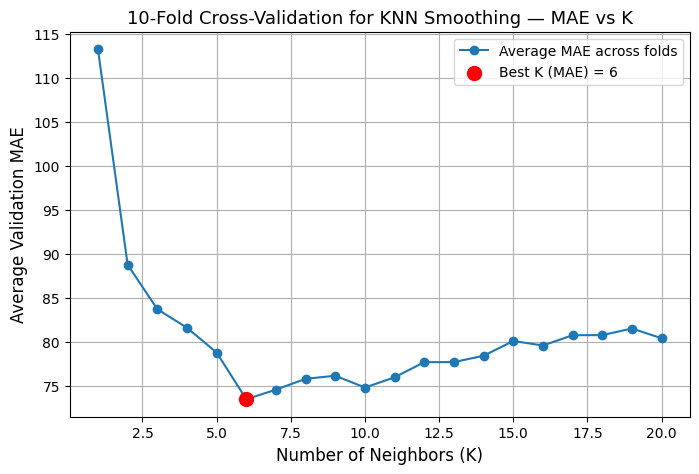

In [540]:
# Plotting the 10-fold cross-validation results for KNN based on MAE scores

plt.figure(figsize=(8,5))
plt.plot(K, mae_scores, marker="o", label="Average MAE across folds")


plt.scatter(best_k_mae, mae_scores[best_k_mae - 1],
            color='red', s=100, zorder=3,
            label=f'Best K (MAE) = {best_k_mae}')


plt.xlabel("Number of Neighbors (K)", fontsize=12)
plt.ylabel("Average Validation MAE", fontsize=12)
plt.title("10-Fold Cross-Validation for KNN Smoothing — MAE vs K", fontsize=13)
plt.legend()
plt.grid(True)


In [541]:
print(best_k_mae)

6


In [542]:
best_k_mse=K[np.argmin(mse_scores)]

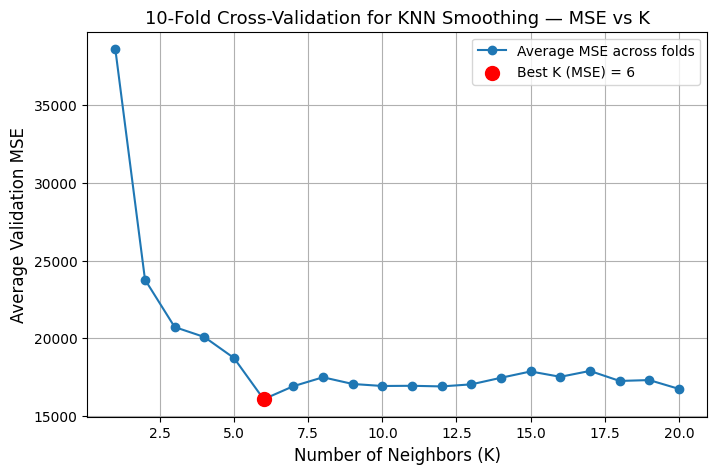

In [543]:
# Plotting the 10-fold cross-validation results for KNN based on MSE scores

plt.figure(figsize=(8,5))
plt.plot(K, mse_scores, marker="o", label="Average MSE across folds")


plt.scatter(best_k_mse, mse_scores[best_k_mse - 1],
            color='red', s=100, zorder=3,
            label=f'Best K (MSE) = {best_k_mse}')


plt.xlabel("Number of Neighbors (K)", fontsize=12)
plt.ylabel("Average Validation MSE", fontsize=12)
plt.title("10-Fold Cross-Validation for KNN Smoothing — MSE vs K", fontsize=13)
plt.legend()
plt.grid(True)


In [544]:
print(best_k_mse)

6


In [545]:
# Training the final KNN regression model using the best K value based on MSE

final_model= KNeighborsRegressor(n_neighbors=best_k_mse)
final_model.fit(np.array(X_train).reshape(-1,1),np.array(y_train))

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [546]:
# Calculating the Mean Squared Error (MSE) on the test data for the final KNN model

test_mse = mean_squared_error(y_test, final_model.predict(np.array(X_test).reshape(-1,1)))

In [547]:
print("Test MSE for KNN Smoother: ", test_mse)

Test MSE for KNN Smoother:  15396.135711805558


**Kernel Smoother**

In [548]:
# Using Gaussian kernel

def gaussian(x):
    return np.exp((-x**2)/2)

In [549]:
# Defining a custom Kernel Regression function with Gaussian kernel

def kernel_reg(x, X_train, y_train, h, kernel=gaussian):
    m = len(x)           # Number of input points to predict
    res = []             # List to store predicted values
    eps = 1e-8           # Small constant to prevent division by zero

    for k in range(m):
        # Computing kernel weights for each training sample relative to x[k]
        wt = kernel((x[k] - X_train) / h)
        s = np.sum(wt)   # Sum of the kernel weights
        
        # If all weights are nearly zero, use the mean of training responses as fallback
        if s < eps:
            res.append(np.mean(y_train))
        else:
            # Computing the weighted average prediction for point x[k]
            res.append(np.sum(wt * y_train) / s)
    
    return np.array(res)  # Returning predictions as a NumPy array


In [550]:
# Performing 10-fold cross-validation to tune the bandwidth (h) for Gaussian Kernel Regression

kf = KFold(n_splits=10, shuffle=True, random_state=0)

H= np.linspace(0.05, 8, 20)

mse_scores=[]
mae_scores=[]

for h in H:
    fold_mse=[]
    fold_mae=[]
    
    for train_index,val_index in kf.split(X_train):
        X_tr, X_val=X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr,y_val=y_train.iloc[train_index], y_train.iloc[val_index]
        
        y_pred=kernel_reg(x=np.array(X_val),X_train=np.array(X_tr),y_train=np.array(y_tr),h=h,kernel=gaussian)
        mse=mean_squared_error(y_val,y_pred)
        mae=mean_absolute_error(y_val,y_pred)
        fold_mse.append(mse)
        fold_mae.append(mae)
        
    avg_mse=np.mean(fold_mse)
    avg_mae=np.mean(fold_mae)
    mse_scores.append(avg_mse)
    mae_scores.append(avg_mae)
    


In [551]:
pd.DataFrame({"h":H,"Average MAE":mae_scores})

,h,Average MAE
0,0.050000,136.898179
1,0.468421,86.676528
2,0.886842,83.137680
3,1.305263,81.925679
4,1.723684,80.793968
5,2.142105,81.400575
6,2.560526,82.220939
7,2.978947,83.385796
8,3.397368,85.058552
9,3.815789,87.303782


In [552]:
best_h_mae=H[np.argmin(mae_scores)]

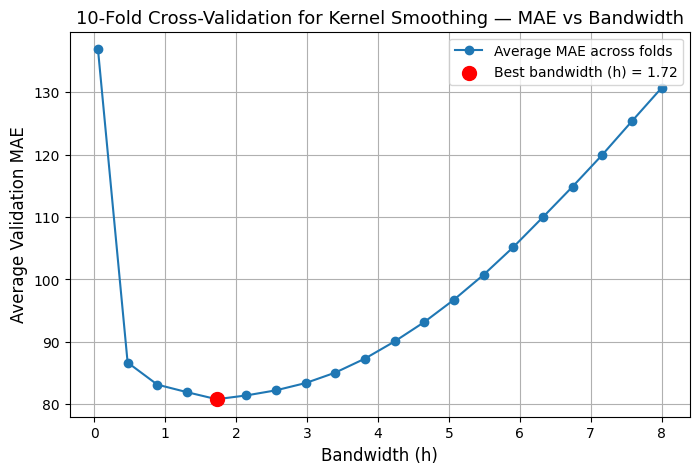

In [553]:
# Identifying and visualizing the best bandwidth (h) for Kernel Regression based on MAE

best_idx_mae = np.argmin(mae_scores)
best_h_mae = H[best_idx_mae]

plt.figure(figsize=(8,5))
plt.plot(H, mae_scores, marker="o", label="Average MAE across folds")
plt.scatter(best_h_mae, mae_scores[best_idx_mae],
            color='red', s=100, zorder=3,
            label=f'Best bandwidth (h) = {best_h_mae:.2f}')

plt.xlabel("Bandwidth (h)", fontsize=12)
plt.ylabel("Average Validation MAE", fontsize=12)
plt.title("10-Fold Cross-Validation for Kernel Smoothing — MAE vs Bandwidth", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()


In [554]:
print(best_h_mae)

1.723684210526316


In [555]:
pd.DataFrame({"h":H,"Average MSE":mse_scores})

,h,Average MSE
0,0.050000,50665.493103
1,0.468421,27270.639113
2,0.886842,25453.908360
3,1.305263,23340.940825
4,1.723684,20252.573776
5,2.142105,19869.653207
6,2.560526,19377.566533
7,2.978947,18875.591680
8,3.397368,18507.678417
9,3.815789,18357.236018


In [556]:
best_h_mse=H[np.argmin(mse_scores)]

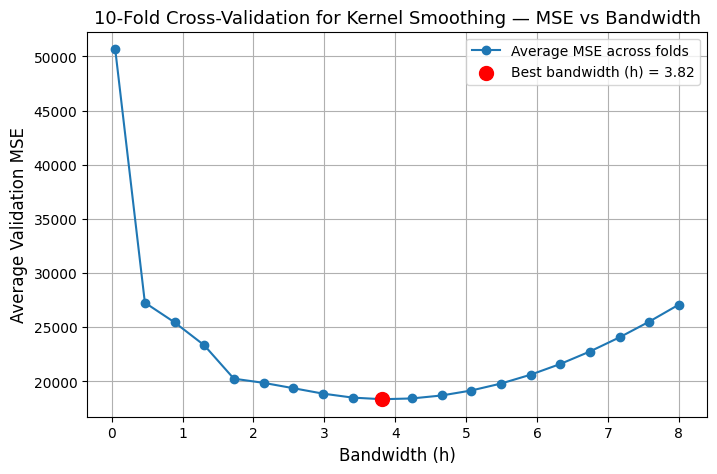

In [557]:
# Identifying and visualizing the best bandwidth (h) for Kernel Regression based on MSE

best_idx_mse = np.argmin(mse_scores)
best_h_mse = H[best_idx_mse]

plt.figure(figsize=(8,5))
plt.plot(H, mse_scores, marker="o", label="Average MSE across folds")
plt.scatter(best_h_mse, mse_scores[best_idx_mse],
            color='red', s=100, zorder=3,
            label=f'Best bandwidth (h) = {best_h_mse:.2f}')

plt.xlabel("Bandwidth (h)", fontsize=12)
plt.ylabel("Average Validation MSE", fontsize=12)
plt.title("10-Fold Cross-Validation for Kernel Smoothing — MSE vs Bandwidth", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()


In [558]:
print(best_h_mse)

3.8157894736842106


In [559]:
final_y_pred_mae = kernel_reg(
    x=np.array(X_test),
    X_train=np.array(X_train),
    y_train=np.array(y_train),
    h=best_h_mae,
    kernel=gaussian
)

final_y_pred_mse = kernel_reg(
    x=np.array(X_test),
    X_train=np.array(X_train),
    y_train=np.array(y_train),
    h=best_h_mse,
    kernel=gaussian
)

In [560]:
final_y_pred_mae

array([615.72863114, 516.44441362, 104.29442446, 669.81289029,
       615.72863114, 436.67471536, 153.21990829, 353.42524992,
       819.04917294, 125.24565157, 145.03725164, 224.69125118,
       436.67471536, 820.75349795, 263.29638021,  12.6290083 ,
       842.80191125, 779.63070792, 145.03725164, 535.22449311,
        11.68093982, 436.67471536, 691.9165865 , 666.02507737,
       615.72863114,  17.5764687 , 135.24781604,  47.22439496,
       131.40958803, 162.89093978, 555.05463117, 569.09451249])

In [561]:
final_y_pred_mse

array([614.91773693, 484.80743073, 119.52708936, 664.29878326,
       614.91773693, 408.32575922, 173.43458941, 351.12177937,
       816.34700887, 142.8742686 , 165.19021763, 230.41257342,
       408.32575922, 757.00706108, 268.37537161,  29.34274228,
       776.20746047, 734.22544892, 165.19021763, 510.75644688,
        27.51969036, 408.32575922, 829.60931671, 661.17338462,
       614.91773693,  37.47052647, 154.41218748,  73.14435883,
       150.00691212, 182.24840762, 539.81403222, 559.68473872])

In [562]:
# Computing the test Mean Squared Error (MSE) for the kernel regression model using the best bandwidth (based on MSE)

test_mse=mean_squared_error(y_test,final_y_pred_mse)

In [563]:
print("Test MSE for Kernel Smoother:", test_mse)

Test MSE for Kernel Smoother: 13510.36271209925


**LOWESS**

In [564]:
# Importing the LOWESS (Locally Weighted Scatterplot Smoothing) function from statsmodels for performing nonparametric regression smoothing.

lowess=sm.nonparametric.lowess

In [565]:
# Performing 10-fold cross-validation to tune the LOWESS smoother's 'frac' (smoothing parameter)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
frac = np.linspace(0.1, 0.75, 20)

mse_scores = []
mae_scores = []

for f in frac:
    fold_mse = []
    fold_mae = []
    
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        X_tr_arr = X_tr.values.flatten()
        X_val_arr = X_val.values.flatten()
        y_tr_arr = y_tr.values
        
        y_pred = lowess(y_tr_arr, X_tr_arr, frac=f, xvals=X_val_arr)
        
        # Skip fold if prediction has NaNs
        if np.any(np.isnan(y_pred)):
            continue
        
        fold_mse.append(mean_squared_error(y_val, y_pred))
        fold_mae.append(mean_absolute_error(y_val, y_pred))

    mse_scores.append(np.mean(fold_mse))
    mae_scores.append(np.mean(fold_mae))



In [566]:
# Finding best fraction

best_frac_mse = frac[np.argmin(mse_scores)]
best_frac_mae = frac[np.argmin(mae_scores)]

print(f"Best fraction (MSE): {best_frac_mse:.3f}")
print(f"Best fraction (MAE): {best_frac_mae:.3f}")

Best fraction (MSE): 0.168
Best fraction (MAE): 0.168


In [567]:
pd.DataFrame({"frac":frac,"Average MSE":mse_scores})

,frac,Average MSE
0,0.100000,24941.526229
1,0.134211,29479.025621
2,0.168421,17808.045998
3,0.202632,20894.851947
4,0.236842,18735.959437
5,0.271053,22636.011238
6,0.305263,21454.050411
7,0.339474,19962.277984
8,0.373684,19804.881874
9,0.407895,19554.766919


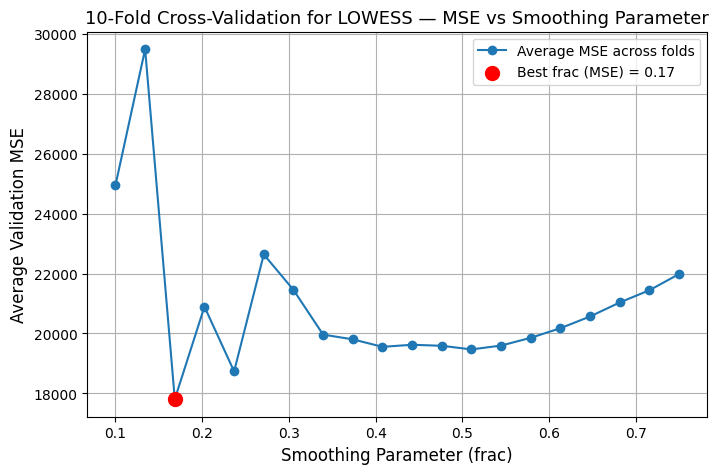

In [568]:
# Identify and visualize the best smoothing parameter (frac) for LOWESS based on MSE

best_idx_mse = np.argmin(mse_scores)
best_frac_mse = frac[best_idx_mse]

plt.figure(figsize=(8,5))
plt.plot(frac, mse_scores, marker="o", label="Average MSE across folds")
plt.scatter(best_frac_mse, mse_scores[best_idx_mse],
            color='red', s=100, zorder=3,
            label=f'Best frac (MSE) = {best_frac_mse:.2f}')

plt.xlabel("Smoothing Parameter (frac)", fontsize=12)
plt.ylabel("Average Validation MSE", fontsize=12)
plt.title("10-Fold Cross-Validation for LOWESS — MSE vs Smoothing Parameter", fontsize=13)
plt.legend()
plt.grid(True)


In [569]:
pd.DataFrame({"frac":frac,"Average MAE":mae_scores})

,frac,Average MAE
0,0.100000,81.596268
1,0.134211,83.841850
2,0.168421,69.681222
3,0.202632,76.413172
4,0.236842,72.423883
5,0.271053,80.889251
6,0.305263,79.757097
7,0.339474,77.750763
8,0.373684,77.867793
9,0.407895,77.269857


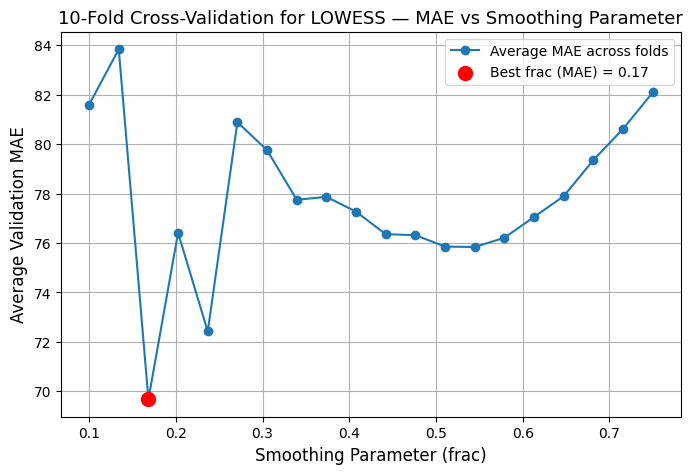

In [570]:
# Identify and visualize the best smoothing parameter (frac) for LOWESS based on MAE

best_idx_mae = np.argmin(mae_scores)
best_frac_mae = frac[best_idx_mae]

plt.figure(figsize=(8,5))
plt.plot(frac, mae_scores, marker="o", label="Average MAE across folds")
plt.scatter(best_frac_mae, mae_scores[best_idx_mae],
            color='red', s=100, zorder=3,
            label=f'Best frac (MAE) = {best_frac_mae:.2f}')

plt.xlabel("Smoothing Parameter (frac)", fontsize=12)
plt.ylabel("Average Validation MAE", fontsize=12)
plt.title("10-Fold Cross-Validation for LOWESS — MAE vs Smoothing Parameter", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()


In [571]:
best_frac=best_frac_mse

In [572]:
best_frac

np.float64(0.16842105263157897)

In [573]:
y_pred_final=lowess(y_train,X_train,frac=best_frac,xvals=X_test)

In [574]:
# Computing the test Mean Squared Error (MSE) for the final LOWESS model using the optimal smoothing parameter (frac)

test_mse= mean_squared_error(y_test,y_pred_final)

In [575]:
print("Test MSE for Lowess : ",test_mse)

Test MSE for Lowess :  21008.72276618028


What hyperparameter(s) did you tune for each smoother?

In this study, different nonparametric smoothers were implemented — namely K-Nearest Neighbors (KNN) smoothing, Kernel Regression, and LOWESS (Locally Weighted Scatterplot Smoothing).  
Each method involves a key hyperparameter that controls the degree of smoothness and hence affects the bias–variance trade-off.  
These hyperparameters were tuned using 10-fold cross-validation to minimize the validation error (MSE or MAE).

1. KNN Smoothing
- Tuned hyperparameter: Number of neighbors (K)  
- Description:
  The parameter `K` determines how many nearby observations are averaged to estimate the smoothed value at each point.  
  Smaller `K` values allow the smoother to follow the data more closely, leading to low bias but high variance.  
  Larger `K` values result in smoother fits with higher bias but lower variance.  
  The optimal `K` was selected based on the minimum cross-validated error.

2. Kernel Regression
- Tuned hyperparameter: Bandwidth (h)  
- Description:
  The bandwidth `h` controls the width of the kernel window, determining the range of data points that influence each prediction.  
  A small `h` leads to highly flexible fits that capture local fluctuations (low bias, high variance),  
  while a large `h` yields smoother, more stable curves (high bias, low variance).  
  The Gaussian kernel was used in this study, and the optimal bandwidth was identified via cross-validation.

3. LOWESS
- Tuned hyperparameter: Fraction of data used in each local regression (frac)  
- Description:
  The parameter `frac` specifies the proportion of data points used to fit each local regression.  
  Smaller values of `frac` produce highly local fits (low bias, high variance),  
  whereas larger values result in smoother trends (high bias, low variance).  
  The best fraction was chosen using cross-validation to achieve the lowest validation error.


Summary: 

| **Smoother**       | **Hyperparameter Tuned** | **Effect on Smoothness**          | **Bias–Variance Behavior**          |
|--------------------|---------------------------|-----------------------------------|------------------------------------|
| KNN Smoothing      | `K`: number of neighbors  | Controls local averaging          | ↑K → ↑Bias, ↓Variance              |
| Kernel Regression  | `h`: bandwidth            | Controls kernel window width      | ↑h → ↑Bias, ↓Variance              |
| LOWESS             | `frac`: fraction of data  | Controls local window size        | ↑frac → ↑Bias, ↓Variance           |


How did the validation error change across the hyperparameter range?

Across all three smoothers, the validation errors (MSE and MAE) showed a U-shaped relationship with respect to the hyperparameter.  
Too small a hyperparameter led to overfitting (high variance), while too large a value caused underfitting (high bias).  
The minimum point of the curve represented the optimal trade-off between bias and variance.

What number of folds did you use in cross-validation, and why?

We used a 10-fold validation approach for our experiments. With only 124 samples, each fold allows ~90% of the data to be used for training and the remaining ~10% as a validation set, helping the model learn effectively. Increasing the number of folds reduces bias because each model sees more training data, while the slight increase in variance from smaller validation sets (~12–13 samples per fold) is minimal. Overall, 10-fold validation provides a good balance between reliable error estimation and efficient model training.

Which error metric(s) did you use, and what are the pros and cons of your choice?

We evaluated model performance using mean absolute error (MAE) and mean squared error (MSE) on the validation sets.

- MAE (Mean Absolute Error)  
  - Measures the average absolute difference between predicted and true values.  
  - Pros: Less sensitive to outliers; easy to interpret in the same units as the target.  
  - Cons: Does not penalize large errors as strongly as MSE.  

- MSE (Mean Squared Error)  
  - Measures the average squared difference between predicted and true values.  
  - Pros: Penalizes larger errors more heavily, useful if large deviations are undesirable.  
  - Cons: Sensitive to outliers; values are in squared units, making interpretation less direct.  

Using both metrics together provides a more complete picture: MAE reflects typical prediction error, while MSE highlights the impact of large deviations.

Which smoother performed best on the test data, and why might that be?

| Smoother Type   | Test MSE          |
|-----------------|-------------------|
| LOWESS          | 21008.72          |
| Kernel Smoother | 13510.36          |
| KNN Smoother    | 15396.136             |

From the results, Gaussian Kernel Regression performed best on the test data, as it achieved the lowest test MSE (13,510.362) compared to KNN and LOWESS.

This suggests that the Gaussian kernel smoother achieved a better bias–variance trade-off. While KNN and LOWESS either overfit local noise or oversmoothed the trend, the kernel regression with an appropriately tuned bandwidth provided enough flexibility to capture the underlying relationship without fitting random fluctuations. Its smooth weighting mechanism allows it to generalize better, resulting in improved predictive performance on unseen data.

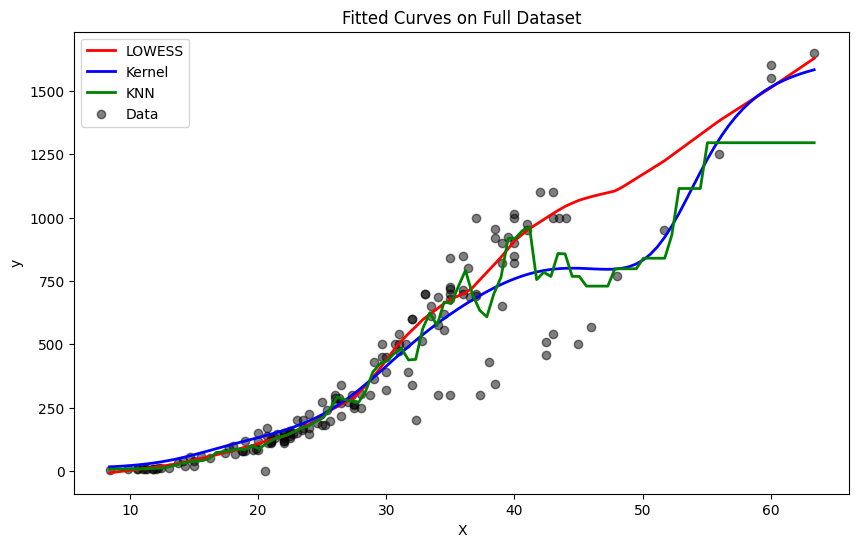

In [576]:
# Comparing fitted smoothers (LOWESS, Gaussian Kernel, and KNN) on the full dataset


best_frac = best_frac  # LOWESS smoothing fraction
best_bw = best_h_mse     # Kernel bandwidth
best_k = best_k_mse        # KNN neighbors

# Flatten all data arrays
X_arr = X.values.flatten()
y_arr = y.values

# Define smooth X curve for plotting
x_curve = np.linspace(np.min(X_arr), np.max(X_arr), 100)

# LOWESS smoother (fit on all data)
lowess_result = sm.nonparametric.lowess(y_arr, X_arr, frac=best_frac)
y_lowess = np.interp(x_curve, lowess_result[:,0], lowess_result[:,1])

# Kernel smoother (Gaussian)
def gaussian(u):
    return np.exp(-0.5 * u**2)

def kernel_smoother(x, y, x_test, bandwidth):
    y_pred = []
    for xt in x_test:
        weights = gaussian((xt - x) / bandwidth)
        y_pred.append(np.sum(weights * y) / np.sum(weights))
    return np.array(y_pred)

y_kernel = kernel_smoother(X_arr, y_arr, x_curve, bandwidth=best_bw)

# KNN smoother
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_arr.reshape(-1,1), y_arr)
y_knn = knn.predict(x_curve.reshape(-1,1))

# Plotting fitted curves
plt.figure(figsize=(10,6))
plt.plot(x_curve, y_lowess, label='LOWESS', color='red', linewidth=2)
plt.plot(x_curve, y_kernel, label='Kernel', color='blue', linewidth=2)
plt.plot(x_curve, y_knn, label='KNN', color='green', linewidth=2)
plt.scatter(X_arr, y_arr, color='black', alpha=0.5, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Curves on Full Dataset')
plt.legend()


Which method achieved the lowest test error?

The Gaussian Kernel Regression method achieved the lowest test error, with a test MSE of 13,510.362. This indicates that it generalized best to unseen data compared to KNN and LOWESS.

Was the best-performing model also the smoothest visually?

No, the best-performing model (Gaussian Kernel Regression) was not the smoothest visually. While it achieved the lowest test MSE, its curve (in blue) still shows moderate fluctuations, especially in regions with sparse data. The LOWESS curve (in red) appears much smoother and follows a more gradual trend across the range of x-values.
This indicates that the model with the lowest numerical test error does not necessarily provide the smoothest visual fit. Gaussian Kernel Regression captured more local variations that helped it reduce test error, whereas LOWESS produced a smoother but slightly less accurate fit overall.

In what situations could another smoother outperform this one?

In some situations, another smoother such as KNN or LOWESS could outperform the Gaussian Kernel Regression. If the true relationship in the data has local or abrupt changes, KNN may adapt better since it relies on local neighborhoods rather than global smoothing. Similarly, if the data are non-uniformly distributed or contain clusters, KNN can provide more flexible local fits. LOWESS could also outperform when the data exhibit heteroscedasticity or when adaptive smoothing is needed, as it adjusts the amount of smoothing across regions of the dataset. In these cases, methods like KNN or LOWESS can capture patterns that a globally smoothed Gaussian kernel might miss.

What does this project teach you about the importance of hyperparameter tuning in
nonparametric regression?

This project highlights that hyperparameter tuning is essential in nonparametric regression because the performance and smoothness of models like KNN, LOWESS, and Gaussian Kernel Regression depend heavily on the chosen parameters. Hyperparameters such as the number of neighbors in KNN, the smoothing fraction in LOWESS, and the bandwidth in kernel regression control the model’s flexibility. Poorly chosen values can lead to underfitting or overfitting—either oversmoothing important patterns or capturing random noise. Through systematic tuning, such as cross-validation, we can identify the balance that minimizes error while preserving the true data structure. This demonstrates that proper hyperparameter selection is key to achieving accurate and generalizable nonparametric models.

Summary Table:

| Method                     | Best Hyperparameter (MAE) | Validation MAE | Best Hyperparameter (MSE) | Validation MSE | Test MSE |
|-----------------------------|---------------------------|----------------|---------------------------|----------------|----------|
| K-Nearest Neighbors (KNN)   | k = 6       | 73.516         | k = 6           | 16080.547         | 15396.136  |
| LOWESS                      | frac = 	0.168           |   69.681     | frac = 	0.168         | 17808.046| 21008.723  |
| Gaussian Kernel Regression| bandwidth = 1.724|80.794| bandwidth = 3.816 | 18357.236| 13510.362 |



Conclusion:

Among all three smoothers, Gaussian Kernel Regression achieved the lowest test MSE (13,510.36), indicating the best predictive performance on unseen data.
This suggests that the chosen bandwidth effectively balanced bias and variance, providing an accurate yet flexible fit.

While the LOWESS smoother offered a smoother and visually appealing fit, it slightly underperformed in predictive accuracy, possibly due to over-smoothing.
The KNN smoother, although simpler, performed reasonably well but was slightly less smooth compared to the kernel regression curve.

Overall, this project highlights that different smoothers may perform better under different data structures — and hyperparameter tuning (choosing k, frac, or bandwidth) is crucial to achieving the right trade-off between smoothness and model accuracy.